In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from funciones_2 import *
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# import dataset: MNIST.csv
df = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP4/data/MNIST_dataset.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# print how many values in the table are 0
print('#(Values) == 0: ', (df == 0).sum().sum())
print('#(Values) != 0: ', (df != 0).sum().sum())

#(Values) == 0:  44381528
#(Values) != 0:  10568472


Podemos observar que aproximadamente 4 de cada 5 datos en la tabla son 0.

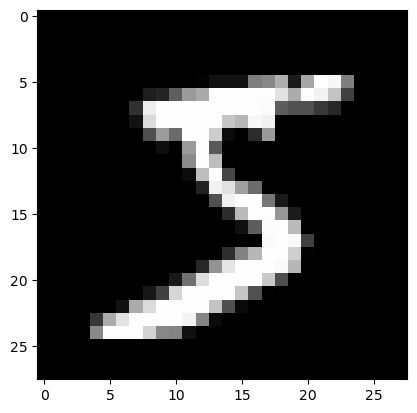

In [4]:
# plot a sample of the dataset as a 28x28 greyscale image
plot_sample(df, 0)

# 1. Reducción de Dimensionalidad
Este problema se basará en el dataset MNIST dataset.csv, que contiene representaciones tabulares de imágenes de dígitos del 0 al 9. Originalmente, cada imagen tiene una resolución de 28x28 píxeles en escala de grises. En este conjunto de datos, cada imagen se representa como una fila de 784 (28x28) valores, donde cada valor representa la intensidad de un pixel en la imagen.
## (a)
 Implementar Principal Component Analysis (PCA) y aplicarlo al conjunto de datos. Graficar cómo varía el error cuadrático medio de reconstrucción sobre el conjunto de datos en función de la cantidad de componentes principales utilizadas.

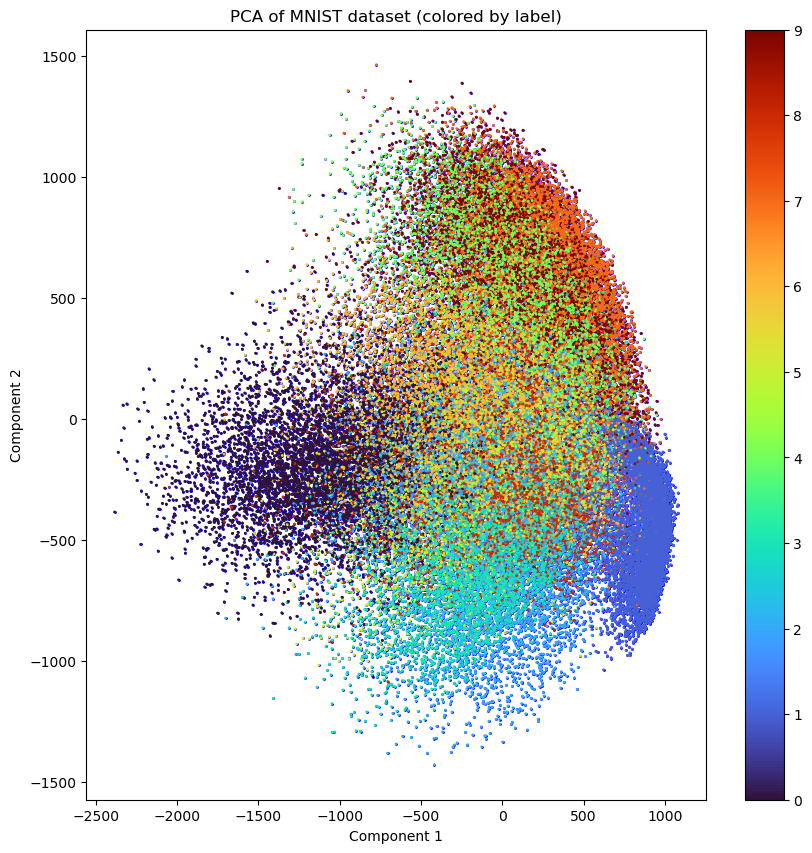

In [5]:
df_ = df.drop(columns=['label'])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_)

# plot PCA
plt.figure(figsize=(10, 10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='blue', s=1)
# color given by label
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['label'], cmap='turbo', s=1)
plt.colorbar()
plt.title('PCA of MNIST dataset (colored by label)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [6]:
X = df.values
# borrar este bloque

In [7]:
X = df.values

n_components_range = range(1, min(X.shape))
mse_scores = []

for n_components in tqdm(n_components_range):
    pca = PCA(n_components)
    X_transformed = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_transformed)
    mse = pca.compute_mse(X, X_reconstructed)
    mse_scores.append(mse)

100%|██████████| 784/784 [1:21:24<00:00,  6.23s/it]


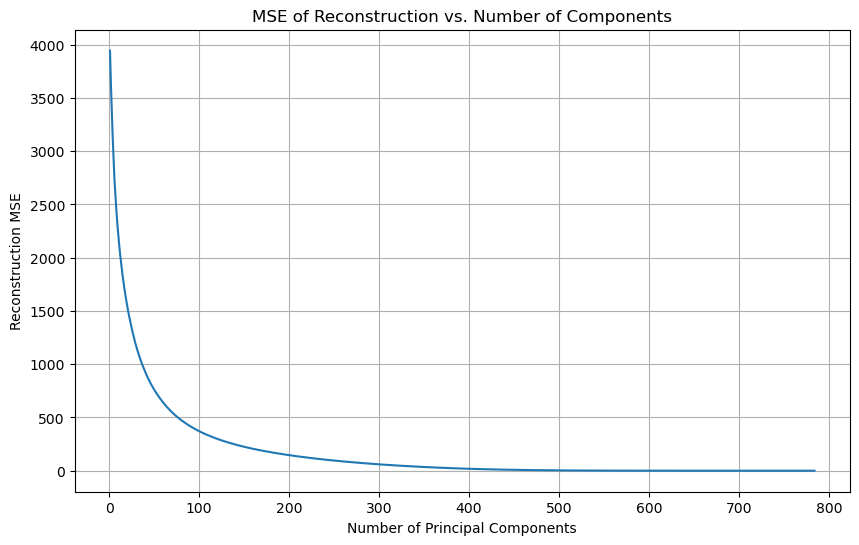

In [8]:
# Plot MSE vs Number of Components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, mse_scores)
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction MSE')
plt.title('MSE of Reconstruction vs. Number of Components')
plt.grid(True)
plt.show()

## (b) 
Seleccionar la cantidad de componentes que considere adecuada y justifique la elección. Usando dicha cantidad de componentes, graficar las imagenes de los digitos originales y reconstruidos para las primeras 10 muestras del dataset.

Basándose en los resultados del gráfico anterior, parecería que lo apropiado sería considerar una cantidad de componentes de entre $100$ y $200$. Esto se debe a que, al principio del gráfico el $MSE$ cae rápidamente al aumentar de cantidad de componentes principales, pero esta caída se vuelve mas gradual, específicamente entre los valores considerados se ve una gran reducción en la pendiente de la curva. A continuación se realizarán los gráficos de la imagen original y la reconstrucción para las primeras $10$ muestras del dataset y analizando estos resultados se elegirá la cantidad de componentes final adecuada

In [9]:
# PCA with 100 components
pca_100 = PCA(n_components=100)
X_transformed_100 = pca_100.fit_transform(X)
X_reconstructed_100 = pca_100.inverse_transform(X_transformed_100)

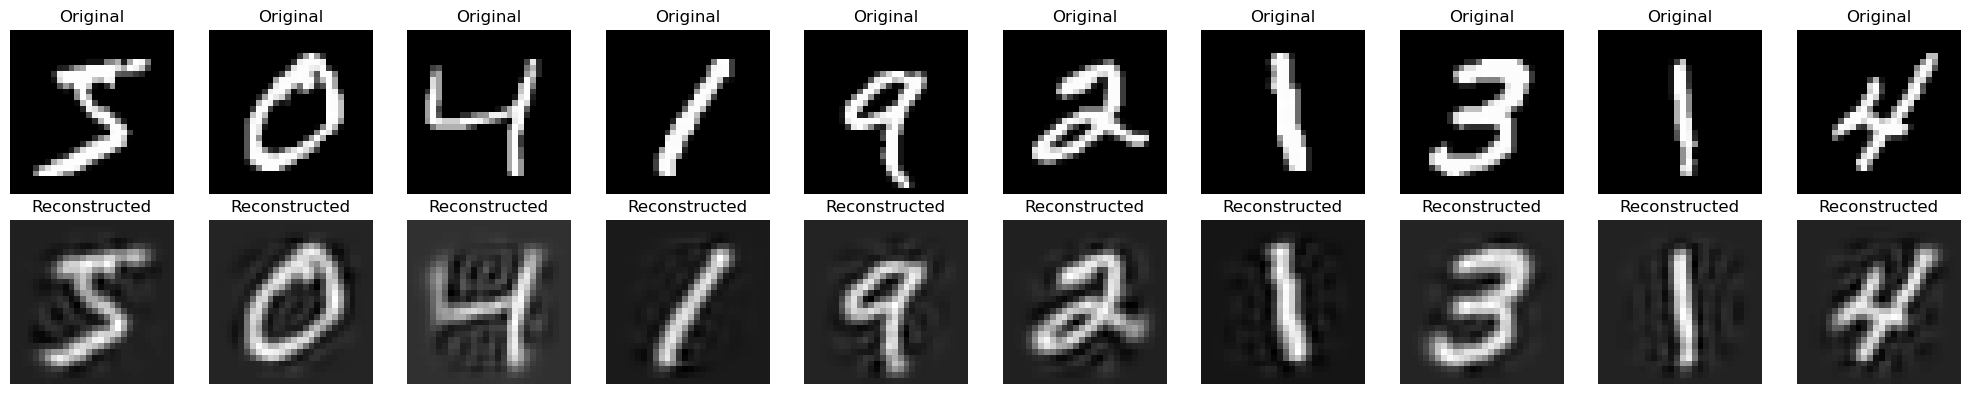

In [10]:
X_re_100 = pd.DataFrame(X_reconstructed_100, columns=df.columns).drop('label', axis=1)
plot_reconstructions(df, X_re_100, 10)

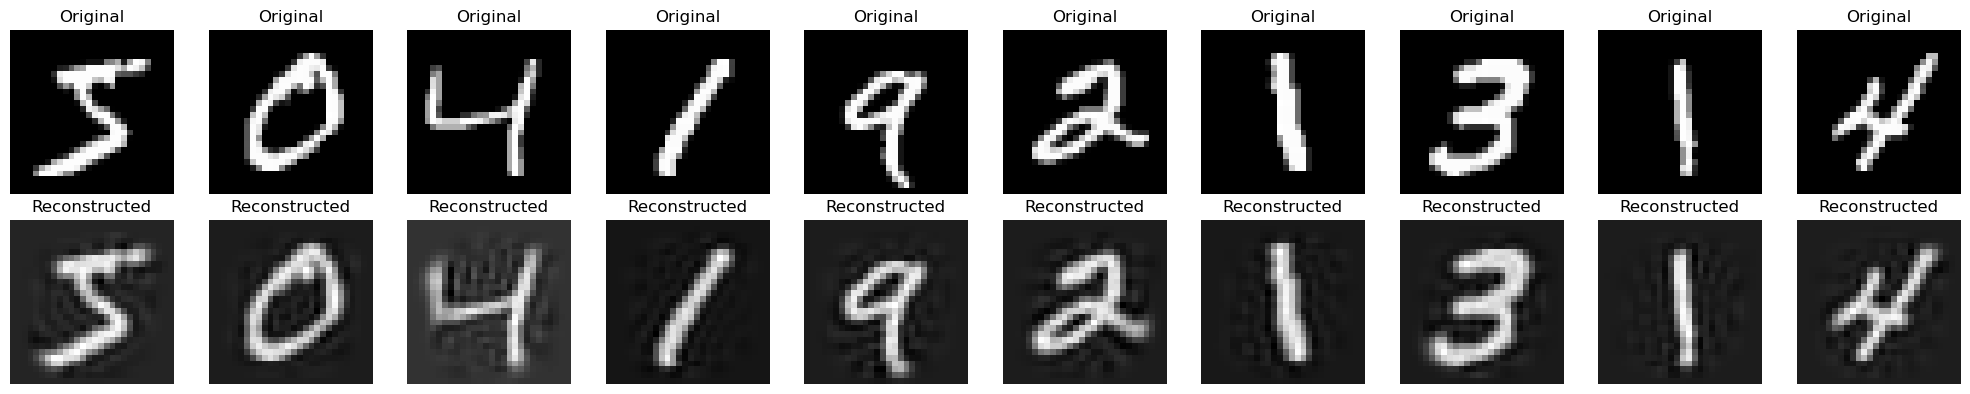

In [11]:
# pca_150 with 150 components
pca_150 = PCA(n_components=150)
X_transformed_150 = pca_150.fit_transform(X)
X_reconstructed_150 = pca_150.inverse_transform(X_transformed_150)
X_re_150 = pd.DataFrame(X_reconstructed_150, columns=df.columns).drop('label', axis=1)
plot_reconstructions(df, X_re_150, 10)

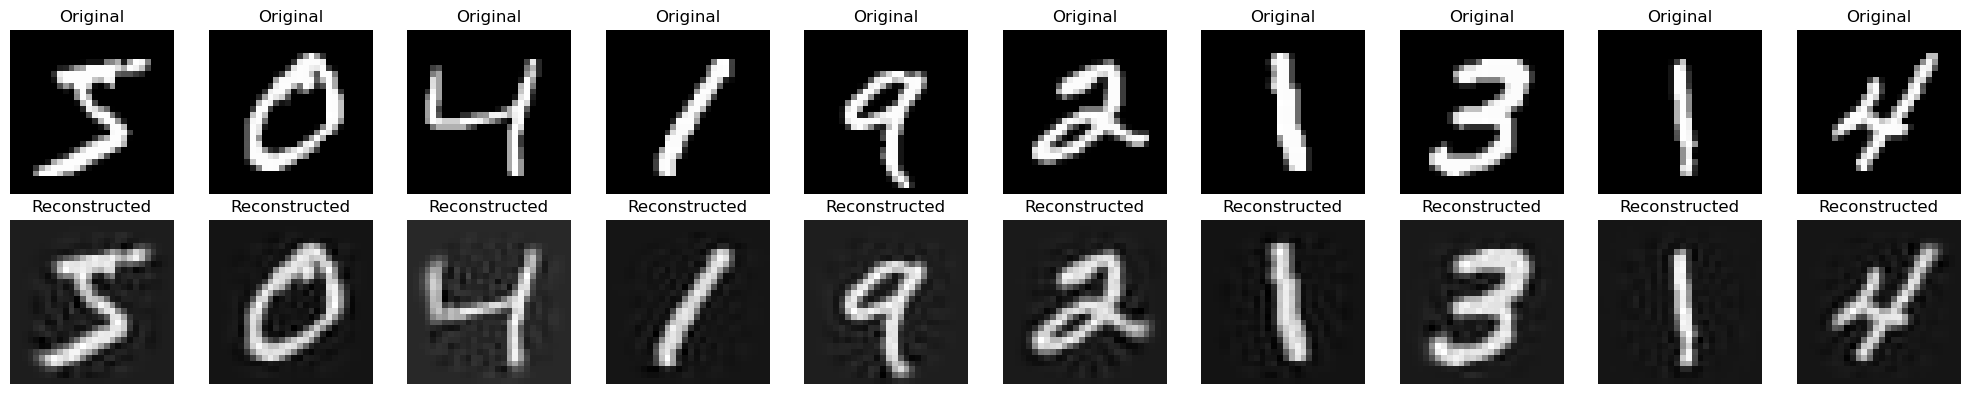

In [12]:
# pca_200 with 200 components
pca_200 = PCA(n_components=200)
X_transformed_200 = pca_200.fit_transform(X)
X_reconstructed_200 = pca_200.inverse_transform(X_transformed_200)

X_re_200 = pd.DataFrame(X_reconstructed_200, columns=df.columns).drop('label', axis=1)
plot_reconstructions(df, X_re_200, 10)

Ya en el primer caso, con $100$ componentes se obtuvieron imágenes de reconstrucción en las que se puede visualizar claramente los números en las $10$ muestras consideradas. Dado esto el número final de componentes a considerar es: $100$. Algo que podría hacerse para posiblemente mejorar esta selección, es en vez de tomar las primeras $10$ muestras, seleccionar las 10 muestras que mas error ($MSE) presentan y ver con que cantidad de componentes uno puede observar con claridad el número correspondiente. 

## (c) 
OPCIONAL: Construir un modelo de autoencoder variacional (VAE) en PyTorch para procesar el conjunto de datos MNIST. Recuerde dividirlo en dos subconjuntos: entrenamiento y validación. El subconjunto de entrenamiento se empleará para entrenar el VAE, mientras que el de validación servirá para ajustar los hiperparámetros y evaluar el error de reconstrucción. Una vez desarrollado el VAE, compare la calidad de las imágenes reconstruidas con las obtenidas mediante PCA en el inciso anterior, utilizando 10 muestras aleatorias del conjunto de validación del VAE.

In [18]:
# VAE in PyTorch
import torch
from torch.utils.data import DataLoader, TensorDataset
# from torchvision import transforms
from torch import nn
from torch.nn import functional as F
from sklearn.model_selection import train_test_split
from itertools import product

In [19]:
# train-test split
X_train_, X_test_ = train_test_split(df, test_size=0.2, random_state=42)

# check the distribution of the labels in the train and test sets
print("X_train\n", X_train_['label'].value_counts())
print("X_test\n", X_test_['label'].value_counts())

X_train
 label
1    6277
7    5790
3    5708
2    5610
0    5560
9    5538
4    5529
6    5480
8    5468
5    5040
Name: count, dtype: int64
X_test
 label
1    1600
7    1503
3    1433
9    1420
6    1396
2    1380
8    1357
0    1343
4    1295
5    1273
Name: count, dtype: int64


In [20]:
# list with first 10 rows of the test set
index_list = list(X_test_.head(10).index)

index_list

[46730, 48393, 41416, 34506, 43725, 11615, 24656, 22411, 936, 56364]

In [21]:
# Convertir DataFrame a Tensor
X_train = torch.tensor(X_train_.drop('label', axis=1).values, dtype=torch.float32) / 255.0
X_test = torch.tensor(X_test_.drop('label', axis=1).values, dtype=torch.float32) / 255.0

# DataLoader para PyTorch
batch_size = 64
train_dataset = TensorDataset(X_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False) 

test_dataset = TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hiperparámetros a probar
grid = {
    'encoder_layers': [
        [(784, 512), (512, 20)],
        [(784, 256), (256, 20)]
    ],
    'decoder_layers': [
        [(20, 512), (512, 784)],
        [(20, 256), (256, 784)]
    ],
    'learning_rate': [1e-3, 1e-4],
    'batch_size': [64, 128]
}

print('Number of combinations:', len(list(product(*grid.values()))))

Number of combinations: 16


In [24]:
best_model = None
best_loss = float('inf')

for encoder, decoder, lr, batch_size in product(
    grid['encoder_layers'], 
    grid['decoder_layers'],
    grid['learning_rate'],
    grid['batch_size']
):
    # Crear una instancia del modelo con los hiperparámetros actuales
    model = VAE(encoder_layers=encoder, decoder_layers=decoder)
    # optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    # Crear DataLoader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Entrenamiento del modelo
    model.train_model(train_loader, device=device, epochs=10, lr=lr, verbose=0)
    # for epoch in range(10):  # número de épocas
    #     model.train()
    #     for data in train_loader:
    #         data = data[0].to(device)
    #         optimizer.zero_grad()
    #         recon_batch, mu, logvar = model(data)
    #         loss = model.loss_function(recon_batch, data, mu, logvar)
    #         loss.backward()
    #         optimizer.step()

    # Evaluar el modelo en el conjunto de prueba
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data in test_loader:
            data = data[0].to(device)
            recon, mu, logvar = model(data)
            test_loss += model.loss_function(recon, data, mu, logvar).item()
    test_loss /= len(test_loader.dataset)
    
    print(f"Test Loss for {encoder}, {decoder}, LR: {lr}, Batch: {batch_size}: {test_loss}")
    
    # Guardar el mejor modelo
    if test_loss < best_loss:
        best_loss = test_loss
        best_model = model
        print(f"New best model with loss {best_loss}")

Test Loss for [(784, 512), (512, 20)], [(20, 512), (512, 784)], LR: 0.001, Batch: 64: 105.3438260672433
New best model with loss 105.3438260672433
Test Loss for [(784, 512), (512, 20)], [(20, 512), (512, 784)], LR: 0.001, Batch: 128: 105.64970584542411
Test Loss for [(784, 512), (512, 20)], [(20, 512), (512, 784)], LR: 0.0001, Batch: 64: 113.24890059988839
Test Loss for [(784, 512), (512, 20)], [(20, 512), (512, 784)], LR: 0.0001, Batch: 128: 118.48755538504464
Test Loss for [(784, 512), (512, 20)], [(20, 256), (256, 784)], LR: 0.001, Batch: 64: 106.47636104910714
Test Loss for [(784, 512), (512, 20)], [(20, 256), (256, 784)], LR: 0.001, Batch: 128: 107.04320357840402
Test Loss for [(784, 512), (512, 20)], [(20, 256), (256, 784)], LR: 0.0001, Batch: 64: 118.2044665876116
Test Loss for [(784, 512), (512, 20)], [(20, 256), (256, 784)], LR: 0.0001, Batch: 128: 124.51328696986607
Test Loss for [(784, 256), (256, 20)], [(20, 512), (512, 784)], LR: 0.001, Batch: 64: 105.67891873604911
Test L

In [36]:
print(f"Best model: {best_model} with loss {best_loss}")
batch_size = 64
train_dataset = TensorDataset(X_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False) 

test_dataset = TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

best_model_ = VAE([(784, 512), (512, 20)], [(20, 512), (512, 784)])
best_model_.train_model(train_loader, device=device, epochs=50, lr=0.001, verbose=1)

Best model: VAE(
  (encoder): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
  )
  (fc_mu): Linear(in_features=512, out_features=20, bias=True)
  (fc_logvar): Linear(in_features=512, out_features=20, bias=True)
  (decoder): ModuleList(
    (0): Linear(in_features=20, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=784, bias=True)
    (3): Sigmoid()
  )
) with loss 105.3438260672433
Epoch: 0, Loss: 143.90583154296874
Epoch: 1, Loss: 114.44546854073661
Epoch: 2, Loss: 110.50547337995256
Epoch: 3, Loss: 108.74062973458426
Epoch: 4, Loss: 107.6046095929827
Epoch: 5, Loss: 106.82314728655133
Epoch: 6, Loss: 106.29850710623604
Epoch: 7, Loss: 105.80083828299387
Epoch: 8, Loss: 105.45714080810546
Epoch: 9, Loss: 105.07186192103795
Epoch: 10, Loss: 104.77934411621094
Epoch: 11, Loss: 104.54923347691127
Epoch: 12, Loss: 104.2804109148298
Epoch: 13, Loss: 104.04689211600167
Epoch: 14, Loss: 103.84070843505859
E

In [102]:
encoder_layers = [(784, 400), (400, 20)]
decoder_layers = [(20, 400), (400, 784)]
model = VAE(encoder_layers, decoder_layers)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.train_model(train_loader, device, epochs=10)

Epoch: 0, Loss: 148.36450441196988
Epoch: 1, Loss: 116.08888467843192
Epoch: 2, Loss: 111.51247544642857
Epoch: 3, Loss: 109.31480473981584
Epoch: 4, Loss: 108.13331616210938
Epoch: 5, Loss: 107.3157103969029
Epoch: 6, Loss: 106.73269697788784
Epoch: 7, Loss: 106.27746098981585
Epoch: 8, Loss: 105.85560517229352
Epoch: 9, Loss: 105.56014349365235


In [103]:
def visualize_reconstructions(model, data_loader, device, n_images=10):
    model.eval()                                                        # Set the model to inference mode
    with torch.no_grad():                                               # Turn off gradients for validation, saves memory and computations
        for batch_idx, (data,) in enumerate(data_loader):
            if batch_idx == 0:                                          # Only first batch
                data = data[:n_images].to(device)                       # First 'n_images' samples
                reconstructions, _, _ = model(data)                     # Forward pass
                
                data = data.cpu().numpy()                               # Convert to np.array for visualization
                reconstructions = reconstructions.cpu().numpy()
                
                # Plotting
                fig, axes = plt.subplots(nrows=4, ncols=n_images, figsize=(20, 10))
                for i in range(n_images):
                    # original
                    ax = axes[0, i]
                    ax.imshow(data[i].reshape(28, 28), cmap='gray')
                    ax.set_title('Original')
                    ax.axis('off')
                    # reconstructed by the VAE
                    ax = axes[1, i]
                    ax.imshow(reconstructions[i].reshape(28, 28), cmap='gray')
                    ax.set_title('Reconstructed \nVAE', fontsize=10)
                    ax.axis('off')
                j = 0
                for i in index_list:
                    # reconstructed by PCA_100
                    ax = axes[2, j]
                    ax.imshow(X_re_100.iloc[i].values.reshape(28, 28), cmap='gray')
                    ax.set_title('Reconstructed \nPCA_100', fontsize=10)
                    ax.axis('off')
                    # reconstructed by PCA_200
                    ax = axes[3, j]
                    ax.imshow(X_re_200.iloc[i].values.reshape(28, 28), cmap='gray')
                    ax.set_title('Reconstructed \nPCA_200', fontsize=10)
                    ax.axis('off')
                    j += 1
                
                plt.show()
                break  # Only first batch

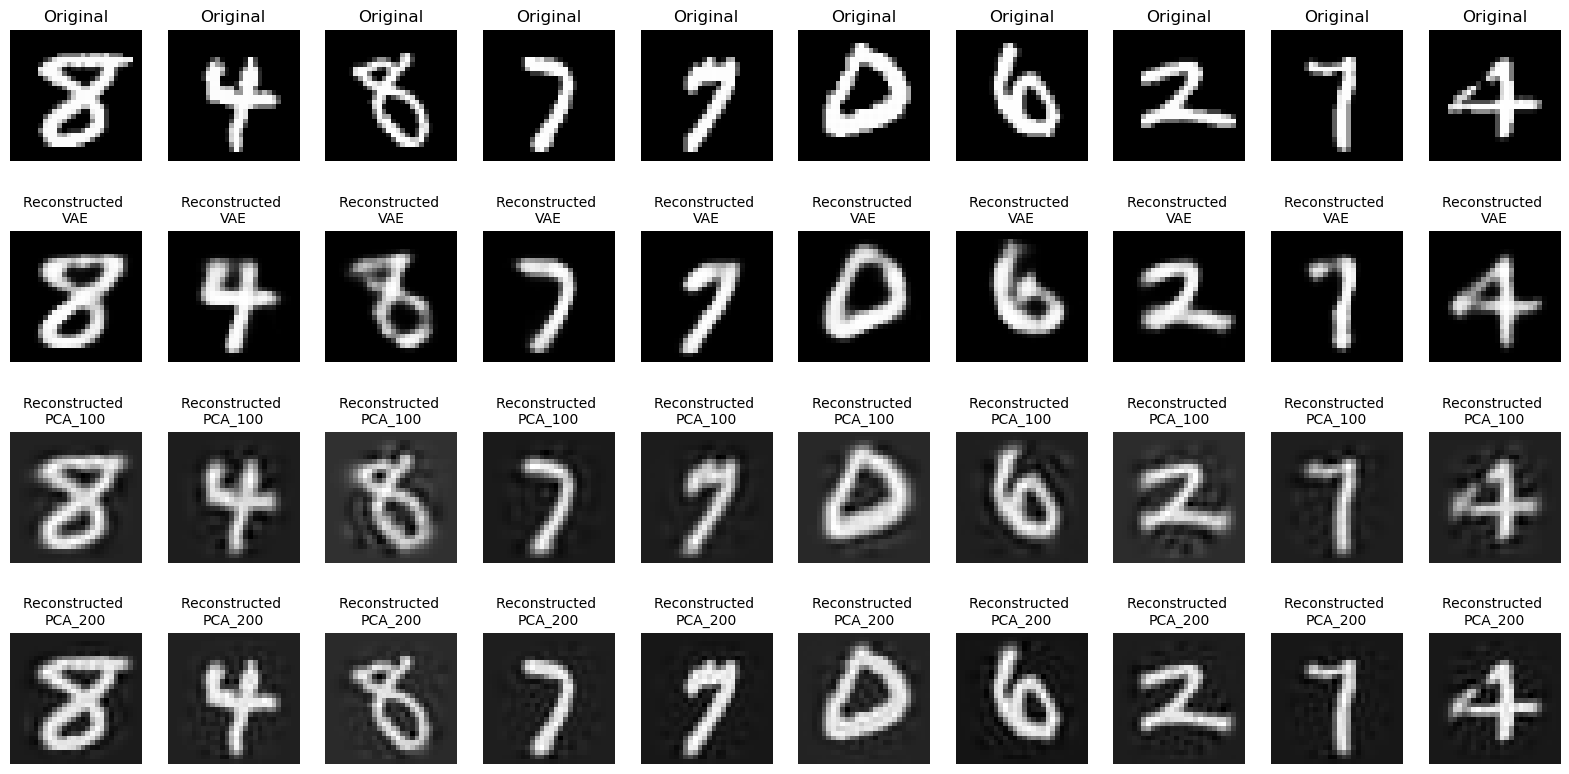

In [104]:
visualize_reconstructions(model, test_loader, device, n_images=10)